# Crime Analysis in Canada

---

## Introduction

The impact that crime has on the quality of life of a community is significant, as it generates fear and distrust, encourages social isolation, reduces economic activity, and negatively affects the development of children. To better understand the factors contributing to these impacts, this project will conduct a detailed analysis of crime patterns and identify their primary influences.

By examining crime rates across various regions throughout Canada, this project aims to identify areas with unusually high or low crime levels, analyze trends over time, and explore correlations with socioeconomic factors such as income and education. This analysis is intended to provide insight into the challenges communities face and suggest effective strategies for crime prevention.

---

## Problem Overview

### Problem Statement

In Canada, crime remains a significant concern, with rates varying considerably across different regions. The factors contributing to these differences continue to be the subject of debate. Although crime statistics are widely available, a focused analysis that explores how certain socioeconomic factors such as income and education levels may be related to regional discrepancies can offer valuable insight into underlying crime trends. A deeper understanding of these patterns can help inform the development of more targeted and effective crime prevention strategies.

### Project Requirements

This project aims to analyze regional crime rates across Canada and explore their potential correlation with socioeconomic factors. To achieve this, the following requirements have been identified:

1. Collect crime statistics across various regions in Canada.
2. Identify regions with significantly higher or lower crime rates.
3. Gather socioeconomic data for these regions, focusing on factors such as income and education.
4. Analyze potential correlations between crime rates and socioeconomic factors.
5. Clearly present findings, using charts and key summaries.

These objectives are intended to provide insight into crime trends in Canada.

---

## Approach

The first step in our analysis was to examine crime rates and socioeconomic factors at a provincial level. We used data from the *Police Reported Crime Statistics in Canada (2022)* dataset and the *Canadian Income Survey (2022)*, both available from Statistics Canada, to gather information on crime rates, income levels, and education. This provided an overview of provincial trends, but did not give detailed insights on the correlation between crime and socioeconomic factors. To explore these relationships further, we strategically selected cities from provinces with high, low, and medium crime rates. These cities included ...

---

## Analysis

All data analysis was conducted using the `pandas` library in Python. This library was well-suited for our purposes, as it provides tools for manipulating, organizing, and analyzing structured data. We also utilized the `matplotlib` library to create visualizations that helped identify patterns in our findings.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

### Provincial Level Analysis

In this section, we analyze crime rates and socioeconomic factors across Canadian provinces to determine if there is a correlation between these variables at a high level. We use information provided by Statistics Canada to examine patterns in reported crime, income, and education levels.

#### Police Reported Crime Statistics Analysis

We began by collecting and cleaning data from the *Police Reported Crime Statistics in Canada (2022)* dataset, which includes information on total crimes, crime rates, and crime severity for each province.

In [58]:
# Police Reported Crime Statistics in Canada (2022)
# **************************************************

# Dataset
crime2022_df = pd.read_csv('../data/police-reported-crime-data-2022.csv', skiprows=[0])

# Clean DF
crime2022_df.columns = crime2022_df.columns.str.strip()
crime2022_df = crime2022_df[ crime2022_df['Location'] != 'Canada' ]
crime2022_df = crime2022_df.rename(columns={ 'Location': 'Province' })
crime2022_df = crime2022_df.rename(columns={ 'Total Crime Severity Index': 'Severity Index' })
crime2022_df = crime2022_df.rename(columns={ 'Total Crime Rate': 'Crime Rate' })

# Crime Data
crime2022_df = crime2022_df[['Province', 'Severity Index','Total Crimes', 'Crime Rate']]


#### Canadian Income Survey Analysis

Next, we collected data from the *Canadian Income Survey (2022)*. This dataset includes information on average after-tax income and education levels throughout each province. For education, we focused on the percentage of individuals who had completed a post-secondary education, using this as an indicator for educational status.


In [59]:
# Canadian Income Survey (2022)
# **************************************************

# Dataset
cis_df = pd.read_csv('../data/canadian-income-survey-2022.csv')

# Province Codes
province_codes = { 10: 'Newfoundland and Labrador', 11: 'Prince Edward Island', 12: 'Nova Scotia', 13: 'New Brunswick', 24: 'Quebec', 35: 'Ontario', 46: 'Manitoba',47: 'Saskatchewan', 48: 'Alberta', 59: 'British Columbia' }

# Clean DF
cis_df['ATINC'] = cis_df['ATINC'].replace(999999999996, pd.NA)
cis_df['HLEV2G'] = cis_df['HLEV2G'].replace([6, 9], pd.NA)

# Income Data
avg_province_income = cis_df.groupby('PROV')['ATINC'].mean().reset_index()
avg_province_income['Province'] = avg_province_income['PROV'].map(province_codes)
avg_province_income = avg_province_income[['Province', 'ATINC']]
avg_province_income['Average Income'] = avg_province_income['ATINC'].apply(lambda x: f"{x:,.2f}")
avg_province_income = avg_province_income[['Province', 'Average Income']]

# Education Data
university_education_df = cis_df[ cis_df['HLEV2G'] == 4 ]
province_education_count = university_education_df.groupby('PROV').size()
province_population_count = cis_df.groupby('PROV').size()

province_education_rate = (province_education_count / province_population_count).reset_index(name='Education Rate')
province_education_rate['Province'] = province_education_rate['PROV'].map(province_codes)
province_education_rate['Education Rate (%)'] = (province_education_rate['Education Rate'] * 100).round(2)
province_education_rate = province_education_rate[['Province', 'Education Rate (%)']]

# Data Summary
cis_data = pd.merge(avg_province_income, province_education_rate, on='Province')


#### Provincial Analysis Summary

To examine the relationship between crime and socioeconomic factors at the provincial level, we combined the data obtained from the *Police Reported Crime Statistics in Canada (2022)* dataset with the data from the *Canadian Income Survey (2022)*. The resulting dataset included information about each province's crime rate, average income after taxes, and the percentage of individuals who have completed a post-secondary education.

In [60]:
# Provincial Analysis Summary
# **************************************************

# Provincial Data
provincial_data = pd.merge(crime2022_df, cis_data, on='Province')
provincial_data['Average Income'] = provincial_data['Average Income'].replace(',', '', regex=True).astype(float)
provincial_data = provincial_data.sort_values(by='Crime Rate', ascending=True)


We then created scatter plots to visualize the relationships between crime rates and socioeconomic indicators, focusing specifically on income and education.

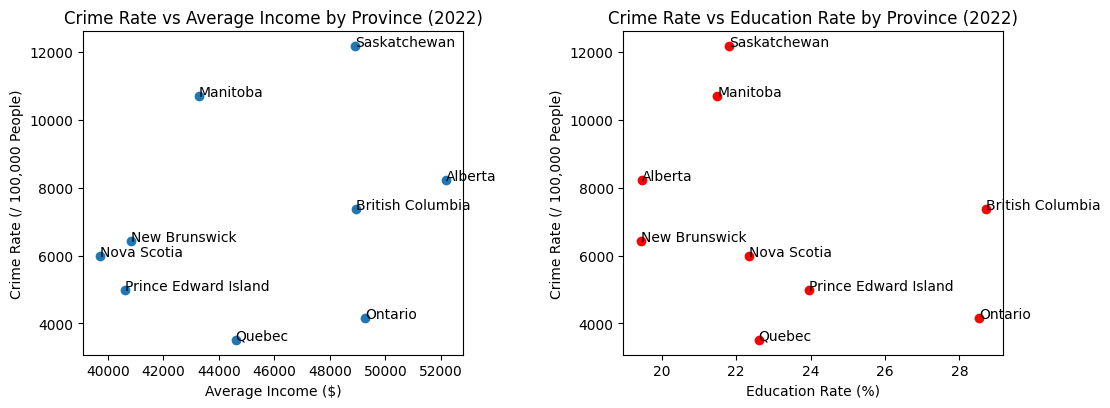

In [61]:
# Data Visualization
# **************************************************

# Plot Data
plt.figure(figsize=(12,5))

# Income
plt.subplot(1, 2, 1)
plt.scatter(provincial_data['Average Income'], provincial_data['Crime Rate'])

for i, row in provincial_data.iterrows():
    plt.text(row['Average Income'], row['Crime Rate'], row['Province'])

plt.title('Crime Rate vs Average Income by Province (2022)')
plt.xlabel('Average Income ($)')
plt.ylabel('Crime Rate (/ 100,000 People)')

# Education
plt.subplot(1, 2, 2)
plt.scatter(provincial_data['Education Rate (%)'], provincial_data['Crime Rate'], color='red')

for i, row in provincial_data.iterrows():
    plt.text(row['Education Rate (%)'], row['Crime Rate'], row['Province'])

plt.title('Crime Rate vs Education Rate by Province (2022)')
plt.xlabel('Education Rate (%)')
plt.ylabel('Crime Rate (/ 100,000 People)')

# Display
plt.tight_layout(pad=4.0)
plt.show()


The resulting scatter plots suggest that there is no strong correlation between provincial crime rates and either income or education levels. For instance, Saskatchewan has the highest crime rate among provinces but also one of the highest average incomes. Similarly, New Brunswick has a relatively low education rate but does not exhibit an unusually high crime rate.

These findings indicate that a provincial-level analysis may not sufficiently explain variations in crime rates across regions. A more specific approach, such as analyzing these statistics at a city-level, may provide clearer insights into the relationship between crime and socioeconomic factors.
